# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
emp = pd.read_csv('employees.csv')
emp.head()

,Unnamed: 0,Name,Department,Education,Gender,Title,Years,Salary
0,0,Jose,IT,Bachelor,M,analyst,1,35
1,1,Maria,IT,Master,F,analyst,2,30
2,2,David,HR,Master,M,analyst,2,30
3,3,Sonia,HR,Bachelor,F,analyst,4,35
4,4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
pd.DataFrame(emp.groupby('Department')['Salary'].mean())

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
pd.pivot_table(emp, values = ['Salary'], index=["Department"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
pd.DataFrame(pd.pivot_table(emp, values = ['Salary'], index=["Department", "Title"], aggfunc=np.mean))

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
pd.DataFrame(pd.pivot_table(emp, values = ['Salary','Years'], index=["Title"], aggfunc=np.mean))

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
employees = emp.groupby(['Department', 'Title']).count()
employees = employees.drop(['Name', 'Education', 'Gender', 'Years', 'Salary'], axis = 1)
employees.columns = ['Employees']
employees

Employees
Department Title               
HR         VP                 1
           analyst            2
IT         VP                 1
           analyst            2
           associate          1
Sales      associate          2

In [8]:
# your code here
employees1 = pd.DataFrame(pd.pivot_table(emp, values = ['Salary'], index=["Department", "Title"], aggfunc=np.mean))
employees1 = employees1.join(employees)
'''I know I could have just added the .count() of the same table to a new column employees1['Employees']
but I did not realize before so I will just leave it that way, enjoy how I make my life more difficult'''
employees1

Salary  Employees
Department Title                       
HR         VP           70.0          1
           analyst      32.5          2
IT         VP           70.0          1
           analyst      32.5          2
           associate    60.0          1
Sales      associate    55.0          2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [9]:
# your code here
stats = pd.DataFrame(pd.pivot_table(emp, values = ['Salary'], index=["Department", "Title"], aggfunc=np.mean))
stats['Median'] = pd.pivot_table(emp, values = ['Salary'], index=["Department", "Title"], aggfunc=np.median)
stats['Minimum'] = pd.pivot_table(emp, values = ['Salary'], index=["Department", "Title"], aggfunc=np.min)
stats['Maximum'] = pd.pivot_table(emp, values = ['Salary'], index=["Department", "Title"], aggfunc=np.max)
stats['Std'] = pd.pivot_table(emp, values = ['Salary'], index=["Department", "Title"], aggfunc=np.std)
stats


Salary  Median  Minimum  Maximum       Std
Department Title                                                
HR         VP           70.0    70.0       70       70       NaN
           analyst      32.5    32.5       30       35  3.535534
IT         VP           70.0    70.0       70       70       NaN
           analyst      32.5    32.5       30       35  3.535534
           associate    60.0    60.0       60       60       NaN
Sales      associate    55.0    55.0       55       55  0.000000

In [10]:
"""
So it's clear that the NaN values occurs when we do not have more than one values to compare
so pandas is not able to calculate it. To fill them I'll use 0 as there are no differnce between 
the values themselves
"""
emp.groupby(['Department','Title']).count()

Unnamed: 0  Name  Education  Gender  Years  Salary
Department Title                                                        
HR         VP                  1     1          1       1      1       1
           analyst             2     2          2       2      2       2
IT         VP                  1     1          1       1      1       1
           analyst             2     2          2       2      2       2
           associate           1     1          1       1      1       1
Sales      associate           2     2          2       2      2       2

#### Based on your comments, fill the missing values with an appropriate value.

In [11]:
# your code here
stats.fillna(0)

Salary  Median  Minimum  Maximum       Std
Department Title                                                
HR         VP           70.0    70.0       70       70  0.000000
           analyst      32.5    32.5       30       35  3.535534
IT         VP           70.0    70.0       70       70  0.000000
           analyst      32.5    32.5       30       35  3.535534
           associate    60.0    60.0       60       60  0.000000
Sales      associate    55.0    55.0       55       55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [12]:
# your code here
employees1['Cost'] = employees1.Salary * employees1.Employees
employees1

Salary  Employees   Cost
Department Title                              
HR         VP           70.0          1   70.0
           analyst      32.5          2   65.0
IT         VP           70.0          1   70.0
           analyst      32.5          2   65.0
           associate    60.0          1   60.0
Sales      associate    55.0          2  110.0

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [13]:
# your code here
employees2 = emp.groupby(['Department', 'Title']).sum()
employees2 = employees2.drop(['Unnamed: 0', 'Salary'], axis = 1)
employees2['Salary'] = employees1['Salary']
employees2

Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [14]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [15]:
# your code here
fitbit = pd.read_csv('fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [16]:
# your code here
print(fitbit.dtypes)
fitbit.describe()

Unnamed: 0                      int64
Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object


,Unnamed: 0,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,183.000000,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,106.088014,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,0.000000,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,91.500000,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,183.000000,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,274.500000,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,366.000000,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [17]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [18]:
import matplotlib.pyplot as plt;

In [26]:
fitbit.columns = fitbit.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
fitbit.info

<bound method DataFrame.info of      unnamed:_0        date  calorie_burned  steps  distance  floors  \
0             0  2015-05-08            1934    905      0.65       0   
1             1  2015-05-09            3631  18925     14.11       4   
2             2  2015-05-10            3204  14228     10.57       1   
3             3  2015-05-11            2673   6756      5.02       8   
4             4  2015-05-12            2495    502      3.73       1   
5             5  2015-05-13             276    779      5.79      15   
6             6  2015-05-14            2687   5614      4.17       2   
7             7  2015-05-15            2793   8169      6.07      14   
8             8  2015-05-16            4061  19971     14.84      18   
9             9  2015-05-17            3349    852      6.33      12   
10           10  2015-05-18            2961  11998      8.91      20   
11           11  2015-05-19            2911  12425      9.23      14   
12           12  2015-05-20     

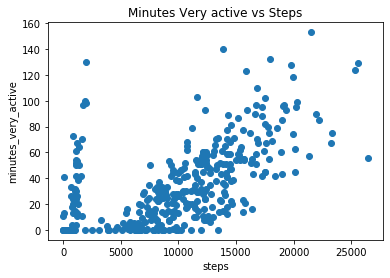

In [28]:

plt.scatter(fitbit.steps, fitbit.minutes_very_active)
plt.title('Minutes Very active vs Steps')
plt.xlabel('steps')
plt.ylabel('minutes_very_active')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
I'd say that there is a relation between them, but actually there is
a specific range (very specific, just between 0 and 3000 steps) where 
the relation might be corrupted
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [29]:
# your code here
fitbit.minutes_sedentary.corr(fitbit['steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

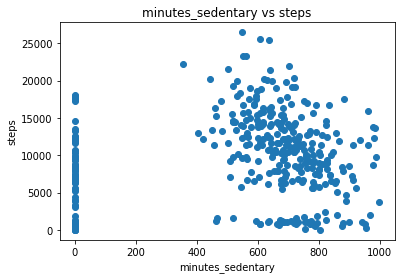

In [35]:
# your code here
plt.scatter(fitbit.minutes_sedentary, fitbit.steps)
plt.title('minutes_sedentary vs steps')
plt.xlabel('minutes_sedentary')
plt.ylabel('steps')
plt.show()

In [ ]:
"""
So there is no relation at all, pretty messy plot
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [32]:
# your code here
fitbit.minutesofsleep.corr(fitbit['steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

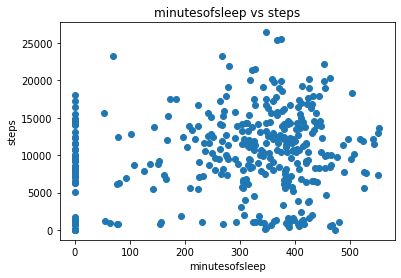

In [34]:
# your code here
plt.scatter(fitbit.minutesofsleep, fitbit.steps)
plt.title('minutesofsleep vs steps')
plt.xlabel('minutesofsleep')
plt.ylabel('steps')
plt.show()

In [ ]:
"""
In this one we do not have  a clear relation neither
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [36]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [43]:
fitbit.columns

Index(['unnamed:_0', 'date', 'calorie_burned', 'steps', 'distance', 'floors',
       'minutes_sedentary', 'minutes_lightly_active', 'minutes_fairly_active',
       'minutes_very_active', 'activity_calories', 'minutesofsleep',
       'minutesofbeingawake', 'numberofawakings', 'lengthofrestinminutes',
       'distance_miles', 'days', 'days_encoded', 'work_or_weekend',
       'hours_sleep', 'sleep_efficiency', 'yesterday_sleep',
       'yesterday_sleep_efficiency', 'months', 'months_encoded'],
      dtype='object')

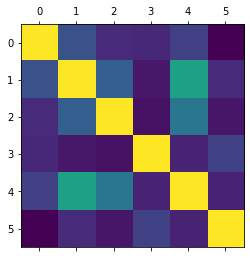

,calorie_burned,steps,floors,minutes_sedentary,minutes_very_active,minutesofsleep
calorie_burned,1,0.255305,0.130757,0.125353,0.197881,0.0114849
steps,0.255305,1,0.306511,0.0769061,0.571452,0.130986
floors,0.130757,0.306511,1,0.0578122,0.399503,0.0694642
minutes_sedentary,0.125353,0.0769061,0.0578122,1,0.105963,0.204242
minutes_very_active,0.197881,0.571452,0.399503,0.105963,1,0.108018
minutesofsleep,0.0114849,0.130986,0.0694642,0.204242,0.108018,1


In [51]:
# your code here
cor_fit = fitbit[['calorie_burned', 'steps', 'floors', 'minutes_sedentary', 'minutes_very_active', 'minutesofsleep']]

plt.matshow(cor_fit.corr())
corr = cor_fit.corr()
plt.show()
corr.style.background_gradient(cmap='coolwarm')

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [53]:
# your code here
corr.steps.sort_values(ascending = False)

steps                  1.000000
minutes_very_active    0.571452
floors                 0.306511
calorie_burned         0.255305
minutesofsleep         0.130986
minutes_sedentary      0.076906
Name: steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [54]:
# your code here
time = pd.read_csv('time_grades.csv')

#### Show visually the frequency distribution of the `time_grades` dataset.

In [63]:
# your code here
'''How am I supposed to show de frecuency distribution of a DATASET?
I do not mean it is not possible but still i thought it was all about values
and that's something datasets have not'''

"How am I supposed to show de frecuency distribution of a DATASET?\nI do not mean it is not possible but still i thought it was all about values\nand that's something datasets have not"

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [64]:
# your code here
x = time['Study time'].corr(time['Grade'], method = 'spearman')
y = time['Study time'].corr(time['Grade'], method = 'pearson')
print(x,y)

0.819658753036942 0.7980456073578858


In [ ]:
"""
It is clear that there is a relation and it is really high
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

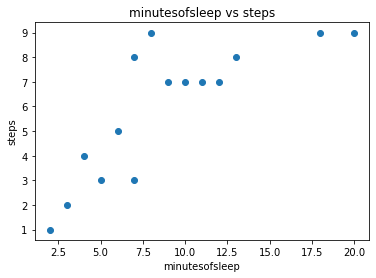

In [66]:
# your code here
plt.scatter(time['Study time'], time.Grade)
plt.title('minutesofsleep vs steps')
plt.xlabel('minutesofsleep')
plt.ylabel('steps')
plt.show()

In [ ]:
"""
I'd say there is a relation, but now looking at the frequency too
I'd say we do not have enough data to be sure about it
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
While pearson is linear, spearman is not, so there will be a difference
if the relation is not perfectly linear. It happens because spearman is more about
single data and pearson just see the big pic
"""